In [1]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [14]:
data, labels = datasets.make_blobs(n_samples = 200, n_features=3,centers=3 ,random_state=20)
data,data_test,labels,labels_test = train_test_split(data,labels,test_size = 0.2,shuffle=True)
data.shape, data_test.shape, labels.shape, labels_test.shape
data[1,:],labels[1]

(array([ 7.4004098 , -8.46383918,  3.88747308]), 1)

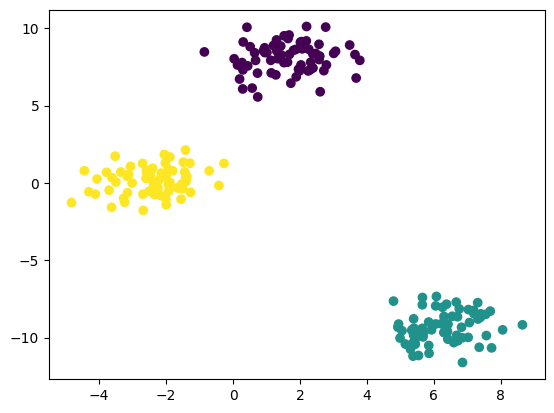

In [3]:
plt.scatter(data[:,0], data[:,1],c = labels)

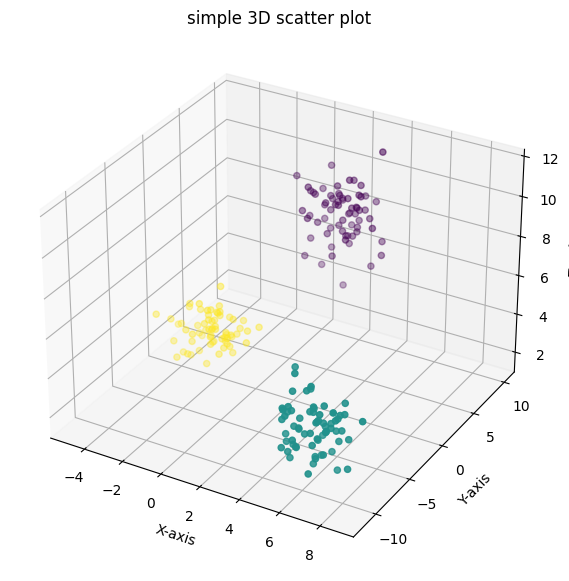

In [41]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(data[:,0], data[:,1], data[:,2], c = labels)
plt.title("simple 3D scatter plot")

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
 
# show plot
plt.show()

In [5]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(data, labels)
neigh.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [45]:
class KNN_classifier:
    def __init__(self,k_neighbours):
        self.k_neighbours=k_neighbours

    def euclidean(self,x1,x2):
        return (sum([(x1[i]-x2[i])**2 for i in range(len(x1))]))**(0.5)
    
    def fit(self,X,y):
        self.X = X
        self.y = y
    
    def predict(self,X_pred):
        distances = []
        for x1 in X_pred:
            t = []
            for x2 in range(len(self.X)):
                try:
                    if len(x1) != len(self.X[x2]):
                        raise Exception
                    t.append([self.euclidean(x1,self.X[x2]), self.y[x2]])
                except:
                    print("Length of train data and prediction data not matching")
                    break
            distances.append(t)
        
        for i in range(len(distances)):
            distances[i].sort(key = lambda tup: tup[0], reverse=True)
        
        pred =[]
        for pt_dist in distances:
            temp = []
            for j in pt_dist[:5]:
                temp.append(j[1])
            freq = dict((i, temp.count(i)) for i in set(temp))
            ls = list(freq.items())
            ls.sort(key = lambda tup: tup[1], reverse=True)
            pred.append(ls[0][0])
        return pred            
    

In [49]:
classifier = KNN_classifier(3)
classifier.fit(data,labels)
print(classifier.predict([[7,8,3],[-100,-100,100]]))

[1, 0]
